<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [62]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(n=100)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
95,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
98,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56


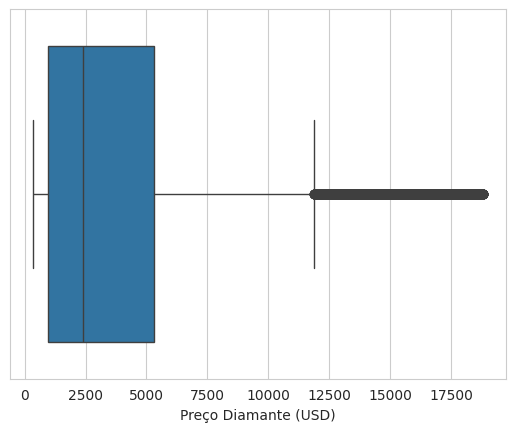

In [9]:
# gráfico do exercício 1

with sns.axes_style('whitegrid'):

  diamonds_price_grafic = sns.boxplot(data=data, x='price')
  diamonds_price_grafic.set(xlabel='Preço Diamante (USD)')

**Insight do gráfico 1**: O boxplot mostra a dispersão dos preços dos diamantes. Podemos observar a variação dos preços, desde o menor valor representado pelo ponto à esquerda do "whisker" até o maior valor representado pelo ponto direito do "whisker".

 A linha dentro da caixa representa a mediana (segundo quartil) dos preços. A caixa em si representa o intervalo interquartil (IQR), que contém 50% dos dados, com o limite inferior do IQR no primeiro quartil (25º percentil) e o limite superior no terceiro quartil (75º percentil).

 Pontos fora dos "whiskers" do boxplot representam valores atípicos ou outliers. Esses pontos podem indicar diamantes com preços significativamente mais altos do que a maioria dos diamantes no conjunto de dados.

 Podemos observar se a distribuição dos preços é simétrica ou assimétrica com base na posição da mediana em relação à caixa. Se a mediana estiver no centro da caixa, a distribuição é mais simétrica; se estiver mais próxima de um extremo, a distribuição pode ser assimétrica.

 A altura da caixa indica a concentração dos preços. Uma caixa mais alta sugere que há mais variação nos preços, enquanto uma caixa mais curta indica que os preços estão mais concentrados em uma faixa específica.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [103]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(n=500)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
495,0.71,Premium,D,SI1,62.7,60.0,2822,5.71,5.67,3.57
496,0.71,Premium,D,SI1,61.3,58.0,2822,5.75,5.73,3.52
497,0.70,Premium,D,SI1,60.2,60.0,2822,5.82,5.75,3.48
498,0.70,Ideal,D,SI1,60.7,56.0,2822,5.75,5.72,3.48


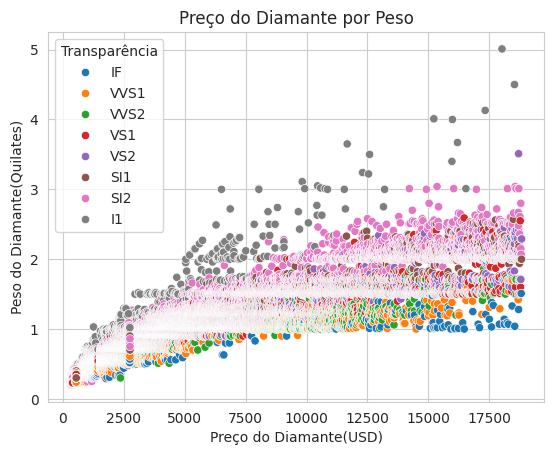

In [104]:
# gráfico do exercício 2
diamonds_df = data[['price','carat','clarity']]
with sns.axes_style('whitegrid'):
  grafic = sns.scatterplot(data=data, x='price',y='carat',hue='clarity')
  grafic.set(title='Preço do Diamante por Peso',xlabel='Preço do Diamante(USD)',ylabel='Peso do Diamante(Quilates)')
  grafic.get_legend().set_title('Transparência')

**Insight do gráfico 2**: Em geral, pode-se observar uma tendência de que diamantes mais pesados (maior carat) tendem a ter preços mais altos. Isso é esperado, pois diamantes maiores são mais raros e, portanto, mais valiosos.

Dentro de cada nível de transparência (clarity), podemos observar uma dispersão de pontos ao longo do eixo y (preço). Isso sugere que, mesmo dentro do mesmo nível de transparência, há uma variação significativa nos preços dos diamantes, que pode ser influenciada por outros fatores como corte, cor, e outros elementos de qualidade.

Comparando os diferentes grupos de transparência, podemos observar se há uma diferença discernível nos preços dos diamantes. Por exemplo, podemos observar se os diamantes com maior transparência (clarity) tendem a ter preços mais altos em comparação com aqueles com menor transparência.

A visualização pode revelar pontos que estão fora do padrão esperado. Esses pontos podem representar diamantes que têm um preço atípico para o seu peso e nível de transparência. Essas anomalias podem ser investigadas mais a fundo para entender suas razões.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [112]:
import seaborn as sns

data = sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


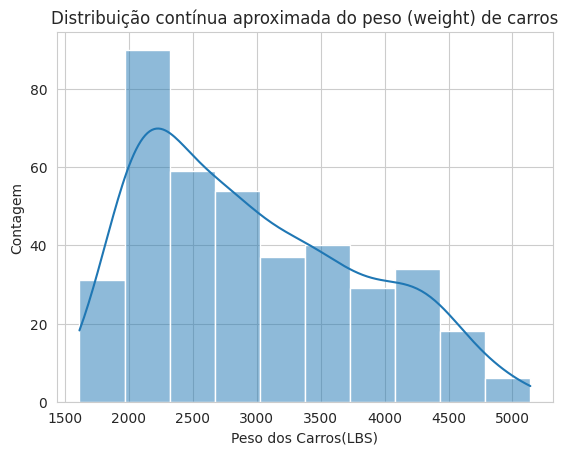

In [110]:
# gráfico do exercício 3
with sns.axes_style('whitegrid'):
  grafic = sns.histplot(data=data, x='weight',kde=True)
  grafic.set(title='Distribuição contínua aproximada do peso (weight) de carros',xlabel='Peso dos Carros(LBS)',ylabel='Contagem')


**Insight do gráfico 3**: Observando o gráfico, nota-se que existe uma quantidade maior dos modelos de carros que têm os seus pesos avaliados entre 1.500-3500, e que a menoria têm seus pesos na casa dos 3.500-5.000, o que pode indicar que existem menos modelos de tamanho maiores (SUV's e caminhonetes por exemplo) em relação aos tamanhos menores(como SEDAN e HATCHBACKS por exemplo).

---